# Práctica 1

Laboratorio 3

Práctica 1

Autores: Raúl Jiménez Juárez 
         Beatriz Magán Pinto 
         David Alonso Rodríguez Lepina 
         Andrés Felipe Sánchez Patarroyo 
         
Asignatura: Aprendizaje estadístico & Data Mining    

Fecha: 31 de octubre de 2019

Objetivo: 
La NASA quiere crear un modelo que permita saber si un asteroide es peligroso para el planeta Tierra o no.

# Importamos las librerías necesarias

In [1]:
import numpy as np 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis
import matplotlib as mp
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.pipeline import Pipeline


%matplotlib inline

# Selección del clasificador

El clasificador seleccionado para la realización del ejercicio ha sido el KNN (K-Nearest Neighbours). El motivo de emplear este algoritmo es basicamente para que nuestro clasificador pueda ser representando en un espacio de n-dimensiones.

Asimismo, también se pide calcular la cercanía (en cuanto a atributos) que existe entre las diferentes instancias, en este caso, los asteroides.

# Pre-Procesamiento

## Extraemos DataFrame

In [2]:
df_asteroides = pd.read_csv('RecursosLab3/nasa.csv')
pd.options.display.max_columns = None
df_asteroides.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## Información de atributos

Los atributos de nuestro dataframe son los siguientes:

<ul>
    <li><i><b>Est Dia(min):</b></i> Diámetro mínimo estimado</li>
    <li><i><b>Est Dia(max):</b></i> Diámetro máximo estimado</li>
    <li><i><b>Close Approach Date:</b></i> Fecha aproximada de aproximación a la tierra.</li>
    <li><i><b>Epoch Date Close Approach</b></i> Época aproximada de aproximación a la tierra.</li>
    <li><i><b>Relative Velocity:</b></i> Velocidad relativa.</li>
    <li><i><b>Miles per hour</b></i> Velocidad en millas/hora</li>
    <li><i><b>Miss Dist:</b></i> Distancia de pérdida</li>
    <li><i><b>Orbit ID:</b></i> ID de la órbita.</li>
    <li><i><b>Orbit Determination Date:</b></i> Fecha de determinación de órbita.</li>
    <li><i><b>Orbit Uncertainity:</b></i> Incertidumbre de órbita.</li>
    <li><i><b>Minimum Orbit Intersection:</b></i> Mínima intersección de órbita..</li>
    <li><i><b>Jupiter Tisserand Invariant:</b></i> Invarianza Tisserand de Jupiter.</li>
    <li><i><b>Eccentricity:</b></i> Excentricidad.</li>
    <li><i><b>Semi Major Axis:</b></i> Semieje mayor.</li>
    <li><i><b>Inclination:</b></i> Inclinación.</li>
    <li><i><b>Asc Node Longitude:</b></i> Longitud del nodo Asc.</li>
    <li><i><b>Orbital Period:</b></i> Periodo orbital..</li>
    <li><i><b>Perihelion Distance:</b></i> Distancia del perihelio.</li>
    <li><i><b>Perihelion Arg:</b></i> Argumento del Perihelio.</li>
    <li><i><b>Aphelion Dist:</b></i> Distancia Aphelion.</li>
    <li><i><b>Perihelion Time:</b></i> Tiempo de Perihelion.</li>
    <li><i><b>Mean Anomaly:</b></i> Media de anomalía.</li>
    <li><i><b>Mean Motion:</b></i> Movimiento medio.</li>
    <li><font color="red"><i><b>Hazardous:</b></i> Peligrosidad.</font></li>
</ul>

In [3]:
df_asteroides.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [4]:
display(df_asteroides.describe())

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,1501.013521,1.179881e+12,13.970811,50294.919829,31251.307268,0.256778,99.886706,3.841347e+07,2.386902e+07,28.300619,3.516962,0.082320,5.056111,2.457724e+06,0.382569,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,2711.257465,1.981540e+11,7.293223,26255.601377,16314.209644,0.145798,56.715493,2.181110e+07,1.355279e+07,38.299668,3.078307,0.090300,1.237818,9.202975e+02,0.180444,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,7.413530,7.889472e+11,0.335504,1207.814804,750.489149,0.000178,0.069194,2.660989e+04,1.653462e+04,1.000000,0.000000,0.000002,2.196000,2.450164e+06,0.007522,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,245.485039,1.015574e+12,8.432865,30358.313370,18863.475327,0.133420,51.900211,1.995928e+07,1.240212e+07,9.000000,0.000000,0.014585,4.049500,2.458000e+06,0.240858,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,812.877364,1.203062e+12,12.917889,46504.401181,28896.026390,0.265029,103.096123,3.964771e+07,2.463595e+07,16.000000,3.000000,0.047365,5.071000,2.458000e+06,0.372450,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,1862.194459,1.355558e+12,18.077649,65079.535405,40437.892430,0.384154,149.435921,5.746863e+07,3.570935e+07,31.000000,6.000000,0.123593,6.019000,2.458000e+06,0.512411,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,114294.420501,1.473318e+12,44.633747,160681.487851,99841.227826,0.499884,194.454910,7.478160e+07,4.646713e+07,611.000000,9.000000,0.477891,9.025000,2.458020e+06,0.960261,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


## Eliminamos datos irrelevantes

Eliminaremos los atributos relativos a los diámetros ya que son redundantes debido a que se representa el mismo dato en diferentes medidas. Por ello se deja sólo el diámetro en kilómetros.<br>

Asimismo, también se eliminan todos aquellos registros anticuados. De esta forma, eliminamos todos aquellos asteroides repetidos, manteniendo el asteroide más actualizado.

In [5]:
#Eliminamos atributos
df_asteroides.drop(['Est Dia in M(min)','Est Dia in M(max)', 'Est Dia in Miles(min)', 
                    'Est Dia in Miles(max)','Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Miss Dist.(miles)', 
                    'Relative Velocity km per hr', 'Miles per hour', 'Name', 'Orbiting Body', 'Equinox'], axis=1, inplace=True)

#Ordenamos por fecha
df_asteroides = df_asteroides.sort_values('Close Approach Date', ascending=False)

#Eliminamos los desactualizados
df_asteroides = df_asteroides.drop_duplicates(subset='Neo Reference ID', keep='first')

df_asteroides.drop(['Close Approach Date', 'Orbit Determination Date'], axis=1, inplace=True)
df_asteroides = df_asteroides.reset_index()
df_asteroides.head()

,index,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,4686,3772978,19.109,0.400641,0.895860,1473318000000,35.946852,0.462372,179.862671,69169856.0,13,6,0.051777,4.108,2458000.5,0.405642,1.474045,53.574923,187.642183,653.679098,0.876110,222.436688,2.071980,2.458319e+06,184.820424,0.550729,False
1,4679,3394709,26.300,0.014607,0.032662,1473318000000,17.278498,0.389360,151.461075,58247436.0,6,8,0.040471,6.696,2454418.5,0.225074,0.881848,7.243616,43.263028,302.474700,0.683367,155.100937,1.080329,2.454529e+06,228.373430,1.190182,False
2,4673,3648764,22.600,0.080270,0.179490,1473318000000,16.105216,0.308944,120.179024,46217292.0,12,7,0.084916,3.476,2458000.5,0.518210,2.051086,28.974457,4.315912,1072.936910,0.988193,314.516895,3.113979,2.457603e+06,133.499909,0.335528,False
3,4674,2068346,16.900,1.108039,2.477650,1473318000000,11.238699,0.265371,103.229385,39698964.0,190,0,0.038113,4.389,2458000.5,0.416677,1.507454,16.694578,219.394973,676.027851,0.879333,140.245404,2.135575,2.458321e+06,189.232032,0.532522,True
4,4675,3759005,26.300,0.014607,0.032662,1473318000000,16.016394,0.005899,2.294785,882506.5,2,7,0.005340,3.498,2458000.5,0.630903,2.057251,6.689106,168.084912,1077.778266,0.759325,245.998837,3.355178,2.457684e+06,105.808166,0.334020,False


# Reducción de dimensionalidad

In [6]:
#Obtenemos lista de atributos (sin atributo de clase)
atributos = list(df_asteroides.columns)
atributos = atributos[0:len(atributos)-1]

#Separamos atributos del atributo de clase
x = df_asteroides.loc[:, atributos].values
y = df_asteroides.loc[:,['Hazardous']].values

#Estandarizamos los atributos
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = atributos).head()

,index,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,1.592346,0.894762,-1.081843,0.489903,0.489903,1.360859,2.942320,1.431930,1.431930,1.431930,-0.381661,0.736140,-0.370408,-0.623913,0.318539,0.060540,-0.001329,3.649307,0.139263,-0.083205,0.161878,0.373435,-0.041233,0.624089,0.049929,-0.405162
1,1.587085,0.192575,1.407192,-0.495061,-0.495061,1.360859,0.446410,0.937470,0.937470,0.937469,-0.564229,1.375403,-0.493088,1.506486,-3.342091,-0.928620,-1.099742,-0.551010,-1.260216,-0.993620,-0.632059,-0.278526,-1.045081,-3.151131,0.449453,1.515837
2,1.582574,0.664181,0.126504,-0.327521,-0.327521,1.360859,0.289545,0.392862,0.392862,0.392862,-0.407742,1.055771,-0.010807,-1.144165,0.318539,0.677192,1.068973,1.419071,-1.637734,1.003624,0.623561,1.264978,1.013583,-0.089181,-0.420848,-1.051654
3,1.583326,-2.269575,-1.846448,2.294828,2.294828,1.360859,-0.361095,0.097776,0.097776,0.097776,4.234719,-1.181650,-0.518682,-0.392598,0.318539,0.120988,0.060639,0.305798,0.447046,-0.025271,0.175153,-0.422361,0.023145,0.626670,0.090398,-0.459857
4,1.584078,0.868824,1.407192,-0.495061,-0.495061,1.360859,0.277670,-1.659454,-1.659454,-1.659454,-0.668554,1.055771,-0.874306,-1.126055,0.318539,1.294531,1.080408,-0.601281,-0.050307,1.016174,-0.319178,0.601570,1.257748,-0.008378,-0.674873,-1.056182


In [7]:
#Creamos PCA de 2 componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
df_asteroides_principal = pd.DataFrame(data = principalComponents ,columns = ['Componente 1', 'Componente 2'])
df_asteroides_principal.head(5)

,Componente 1,Componente 2
0,1.815789,1.606623
1,-3.420803,0.607785
2,1.360410,-2.012398
3,3.332648,2.086143
4,-0.394589,-4.404458


In [8]:
df_asteroides.sort_index(inplace=True)

#Unimos ambos DF
df_asteroides_final = pd.concat([df_asteroides_principal, df_asteroides[['Hazardous']]], axis = 1)
df_asteroides_final.head(5)

,Componente 1,Componente 2,Hazardous
0,1.815789,1.606623,False
1,-3.420803,0.607785,False
2,1.360410,-2.012398,False
3,3.332648,2.086143,True
4,-0.394589,-4.404458,False


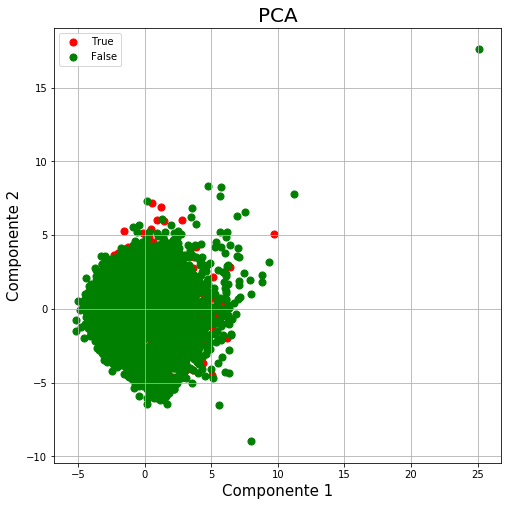

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [True, False]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = df_asteroides_final['Hazardous'] == target
    ax.scatter(df_asteroides_principal.loc[indicesToKeep, 'Componente 1'],
               df_asteroides_principal.loc[indicesToKeep, 'Componente 2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

In [10]:
print('Variación por componente: {}'.format(pca.explained_variance_ratio_))

Variación por componente: [0.21988884 0.20580602]


Como se puede observar, utilizando el PCA se pierde una gran cantidad de información, ofreciendo tan solo un 40% de la misma. Por ello se ha evitado usar este modelo,

# Sets

Para obtener los diferentes sets de entrenamiento y validación, extraeremos el 75% de los primeros registros. Asimismo, para el set de validación usaremos el 25% restante de los datos.

## Set de entrenamiento y validación

In [11]:
#Obtenemos lista de atributos y valores
atributos = df_asteroides.columns
atributos = list(atributos)
atributos = atributos[0:len(atributos)-1]


#Variables de entrenamiento
x = df_asteroides[atributos].values
y = df_asteroides['Hazardous'].values

#Asignamos los sets
x_entrenamiento, x_validacion, y_entrenamiento, y_validacion = train_test_split(x, y, random_state=0, test_size=0.3)
scaler = MinMaxScaler()

#Estandarizamos
x_entrenamiento = scaler.fit_transform(x_entrenamiento)
x_validacion = scaler.transform(x_validacion)

# Configuraciones

In [12]:
def mostrar_confusionMatriz(y_validacion, y_predicho):
    print("\nPrecisión obtenida: ", metrics.accuracy_score(y_validacion, y_predicho))
    confunsionMatriz = confusion_matrix(y_validacion, y_predicho)
    plt.figure(figsize=(6, 6))
    sns.heatmap(confunsionMatriz, annot=True, fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase predicha')
    plt.show()

## Métrica 1: Número de individuos

La primera métrica corresponde al número de individuos que usaremos para clasificar una instancia. Para ello, usaremos diferentes configuraciones y comparar así los resultados obtenidos.

### Configuración 1: k=10


Precisión obtenida:  0.8862815884476535


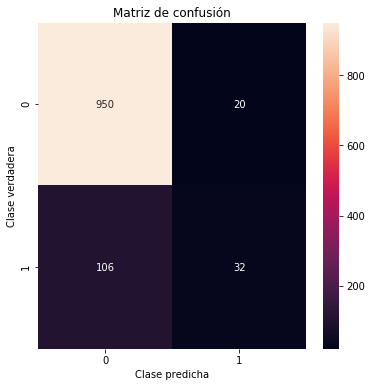

In [13]:
knn1 = KNeighborsClassifier(n_neighbors=10)

#Entrenamos el modelo
knn1.fit(x_entrenamiento,y_entrenamiento)

#Realizamos las predicciones
y_predicho = knn1.predict(x_validacion)

mostrar_confusionMatriz(y_validacion, y_predicho)

### Configuración 2: k=30


Precisión obtenida:  0.8925992779783394


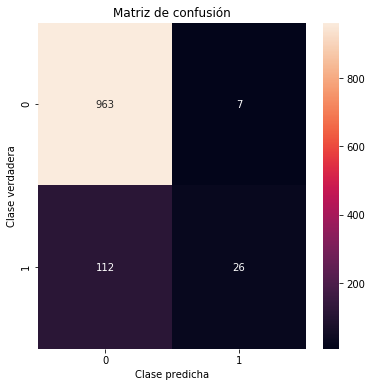

In [14]:
knn2 = KNeighborsClassifier(n_neighbors=30)

#Entrenamos el modelo
knn2.fit(x_entrenamiento,y_entrenamiento)

#Realizamos las predicciones
y_predicho = knn2.predict(x_validacion)

mostrar_confusionMatriz(y_validacion, y_predicho)

### Configuración 3: k=50


Precisión obtenida:  0.8898916967509025


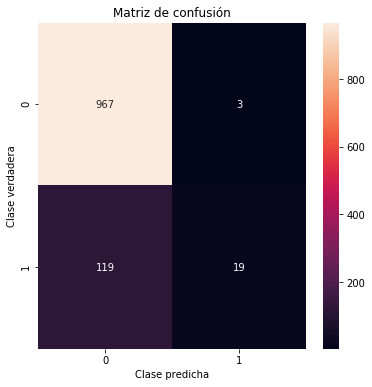

In [15]:
knn3 = KNeighborsClassifier(n_neighbors=50)

#Entrenamos el modelo
knn3.fit(x_entrenamiento,y_entrenamiento)

#Realizamos las predicciones
y_predicho = knn3.predict(x_validacion)

mostrar_confusionMatriz(y_validacion, y_predicho)

## Conclusión Primera métrica

En la primera métrica, se obtiene que la mejor configuración es la segunda. Esto es debido a que la precisión en nuestro set de validación es del 89%, la más alta con respecto al resto de configuraciones probadas. En esta configuración se están teniendo en cuenta 30 vecinos, sin tener en cuenta la distancia respecto a nuestra instacia a la hora de asignar la clase.

Asimismo, también se muestra la denominada 'confusion matrix', donde se pueden observar los aciertos y fallos que ha tenido nuestro clasificador. Se ver que nuestra segunda configuración es la que más aciiertos tiene con respecto al resto de configuraciones (989 aciertos). Como es lógico también tiene menos fallos.

## Métrica 2: Cercanía de la instancia

La segunda métrica corresponde a la cercanía de la instancia a clasificar respecto al resto de instancias de nuestro espacio. Para ello, usaremos diferentes configuraciones y comparar así los resultados obtenidos.

### Configuración 1: Distancia Manhattan


Precisión obtenida:  0.9142599277978339


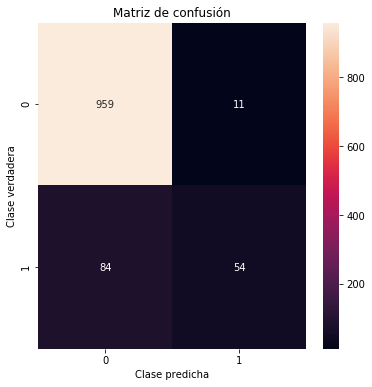

In [16]:
knn1_m2 = KNeighborsClassifier(n_neighbors=15, metric='manhattan', weights='distance')

#Entrenamos el modelo
knn1_m2.fit(x_entrenamiento,y_entrenamiento)

#Realizamos las predicciones
y_predicho = knn1_m2.predict(x_validacion)

mostrar_confusionMatriz(y_validacion, y_predicho)

### Configuración 2: Distancia Euclidea


Precisión obtenida:  0.8916967509025271


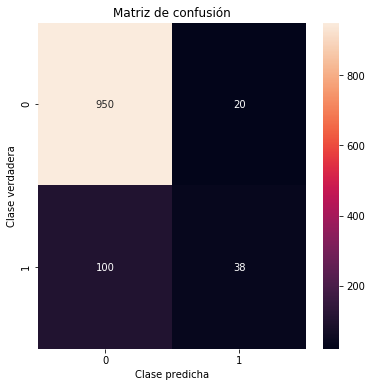

In [17]:
knn2_m2 = KNeighborsClassifier(n_neighbors=15, weights='distance', metric='euclidean')

#Entrenamos el modelo
knn2_m2.fit(x_entrenamiento,y_entrenamiento)

#Realizamos las predicciones
y_predicho = knn2_m2.predict(x_validacion)

mostrar_confusionMatriz(y_validacion, y_predicho)

### Configuración 3: Distancia Minkowski


Precisión obtenida:  0.8916967509025271


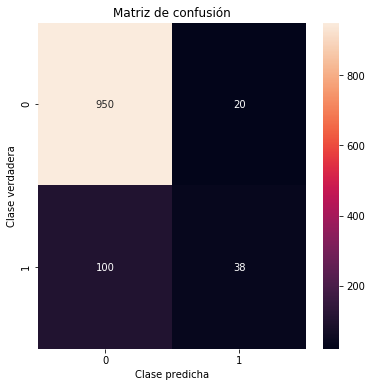

In [18]:
knn3_m2 = KNeighborsClassifier(n_neighbors=15, weights='distance')

#Entrenamos el modelo
knn3_m2.fit(x_entrenamiento,y_entrenamiento)

#Realizamos las predicciones
y_predicho = knn3_m2.predict(x_validacion)

mostrar_confusionMatriz(y_validacion, y_predicho)

## Conclusión Segunda métrica

En la segunda métrica, se obtiene que la mejor configuración es la primera. Esta configuración tiene una precisión de acierto del 91% en nuestro set de validación. En esta configuración seleccionada, se están comprobando los 15 vecinos más proximos basándonos en la distancia Manhattan. Esta configuración, obtiene un total de 1013 aciertos, superando así, no sólo al resto de configuraciones de la segunda métrica sino que también a las configuraciones de la primera métrica. 

Con ello, podemos decir que esta configuración obtenida es la mejor de todas.

# Reducción usando NCA

Para realizar la representanción del KNN es necesario reducir la dimensionalidad de nuestro problema, para ello y visto que el PCA no da resultado, se ha optado por realizar el NCA.

In [19]:
def calcularNCA(x, y):

    x_entrenamiento_nuevo, x_validacion_nuevo, y_entrenamiento_nuevo, y_validacion_nuevo = \
        train_test_split(x, y, test_size=0.3, stratify=y,
                         random_state=0)

    nca = make_pipeline(StandardScaler(),
                        NeighborhoodComponentsAnalysis(n_components=2,
                        random_state=0))
    
    plt.figure()

    nca.fit(x_entrenamiento_nuevo, y_entrenamiento_nuevo)
    
    nuevasComponentesPrincipales = nca.transform(x)
    
    x_entrenamiento_componentes = nca.transform(x_entrenamiento_nuevo)
    x_validacion_componentes = nca.transform(x_validacion_nuevo)
    
    # Plot the projected points and show the evaluation score
    plt.scatter(nuevasComponentesPrincipales[:, 0], nuevasComponentesPrincipales[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN".format('NCA'))
    plt.show()
    
    return nuevasComponentesPrincipales, x_entrenamiento_componentes, x_validacion_componentes, y_entrenamiento_nuevo, y_validacion_nuevo

In [20]:
def representarKNN(knn_nuevo, n_neighbors, x__nuevo, y__nuevo):
    h = .02

    #Mapas de colores
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = x__nuevo[:, 0].min() - 1, x__nuevo[:, 0].max() + 1
    y_min, y_max = x__nuevo[:, 1].min() - 1, x__nuevo[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = knn_nuevo.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also the training and testing points
    plt.scatter(x__nuevo[:, 0], x__nuevo[:, 1], c=y__nuevo, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("{} (k = {})".format('KNN', n_neighbors))
    #plt.text(0.9, 0.1, '{:.2f}'.format(score), size=15, ha='center', va='center', transform=plt.gca().transAxes)

    plt.show()

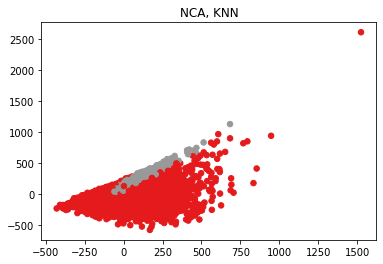

In [21]:
#Calculamos las componentes
componentesPrincipales, x_entrenamiento_comp_nuevo, x_validacion_comp_nuevo, y_entrenamiento_nuevo, y_validacion_nuevo=calcularNCA(x, y)

## Atención

No es posible dibujar la totalidad de las instancias de nuestro dataset debido a la gran cantidad de datos que se tienen. Por ello se deja las funciones que se usarían y las instrucciones comentadas. Tener cuidado ya que el ordenador se queda congelado debido a que absorve todos los recursos del PC.

## NCA Métrica 1 - Configuración 2

In [22]:
#Creamos clasificador temporal
##n_neighbors = 30
##knnTemporal = KNeighborsClassifier(n_neighbors=n_neighbors)
##knnTemporal.fit(x_entrenamiento_comp_nuevo, y_entrenamiento_nuevo)
##precision = knnTemporal.score(x_validacion_comp_nuevo, y_validacion_nuevo)

#Creamos componentes temporales porque con el algoritmo la memoria se consume y el PC se bugea
##componentesPrincipalesTemp = componentesPrincipales[:15]
##yTemp = y[:15]

#Representamos
##representarKNN(knnTemporal, n_neighbors, componentesPrincipalesTemp, yTemp)

## NCA Métrica 2 - Configuración 1

In [23]:
#Creamos clasificador temporal
##n_neighbors = 15
##knnTemporal = KNeighborsClassifier(n_neighbors=n_neighbors, metric='manhattan', weights='distance')
##knnTemporal.fit(x_entrenamiento_comp_nuevo, y_entrenamiento_nuevo)
##precision = knnTemporal.score(x_validacion_comp_nuevo, y_validacion_nuevo)

#Creamos componentes temporales porque con el algoritmo la memoria se consume y el PC se bugea
##componentesPrincipalesTemp = componentesPrincipales[:15]
##yTemp = y[:15]

#Representamos
##representarKNN(knnTemporal, n_neighbors, componentesPrincipalesTemp, yTemp)

# Clasificación de 'nasa_clasificar'

Como hemos comprobado el mejor clasificador ha sido el que usa la distancia de Manhattan teniendo en cuenta los 15 vecinos más cercanos. Por ello, se va a utilizar este clasificador para clasificar este nuevo dataset y comprobar los resultados obtenidos.

Para llevar a cabo la siguiente clasificación, se generará el fichero nasa_clasificar.csv. Este fichero contendrá una cuarta parte de las instancias que tiene nuestro dataset principal. Tras esto, se procederá con la clasificación de los diferentes asteroides y se añadirá una nueva columna al dataframe llamada 'Clase predicha', la cual contendrá la clase que ha predicho nuestro clasificador.

Por último, se mostrará el nuevo dataframe y, además se generará el fichero 'nasa_clasificar_clasificado.csv' donde se guardará la predicción realizada. 

<b>Nota:</b> Tener en cuenta que el apartado de peligrosidad no podrá verse en el .csv debido a que se trata de una variable del tipo bool.

## Lectura de archivo nasa_clasificar.csv

In [24]:
#Extraemos una cuarta de los datos para ser clasificados
##nuevosDatos = df_asteroides.head(int(len(df_asteroides)/4))
##nuevosDatos.tail()
##nuevosDatos.to_csv(r'.\nasa_clasificar.csv')

#Leemos datos
df_nuevosDatos = pd.read_csv('nasa_clasificar.csv')
df_nuevosDatos.head()

,Unnamed: 0,index,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,0,4686,3772978,19.109,0.400641,0.895860,1473318000000,35.946852,0.462372,179.862671,69169856.0,13,6,0.051777,4.108,2458000.5,0.405642,1.474045,53.574923,187.642183,653.679098,0.876110,222.436688,2.071980,2.458319e+06,184.820424,0.550729,False
1,1,4679,3394709,26.300,0.014607,0.032662,1473318000000,17.278498,0.389360,151.461075,58247436.0,6,8,0.040471,6.696,2454418.5,0.225074,0.881848,7.243616,43.263028,302.474700,0.683367,155.100937,1.080329,2.454529e+06,228.373430,1.190182,False
2,2,4673,3648764,22.600,0.080270,0.179490,1473318000000,16.105216,0.308944,120.179024,46217292.0,12,7,0.084916,3.476,2458000.5,0.518210,2.051086,28.974457,4.315912,1072.936910,0.988193,314.516895,3.113979,2.457603e+06,133.499909,0.335528,False
3,3,4674,2068346,16.900,1.108039,2.477650,1473318000000,11.238699,0.265371,103.229385,39698964.0,190,0,0.038113,4.389,2458000.5,0.416677,1.507454,16.694578,219.394973,676.027851,0.879333,140.245404,2.135575,2.458321e+06,189.232032,0.532522,True
4,4,4675,3759005,26.300,0.014607,0.032662,1473318000000,16.016394,0.005899,2.294785,882506.5,2,7,0.005340,3.498,2458000.5,0.630903,2.057251,6.689106,168.084912,1077.778266,0.759325,245.998837,3.355178,2.457684e+06,105.808166,0.334020,False


## Realizamos clasificación


Precisión obtenida:  0.8829902491874323


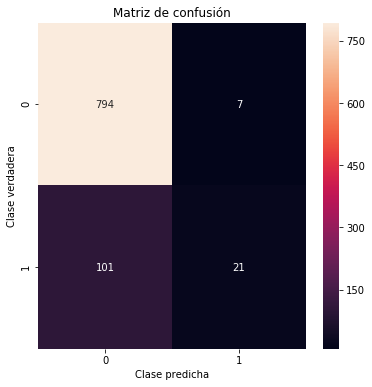

,Unnamed: 0,index,Neo Reference ID,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous,Clase Predicha
0,0,4686,3772978,19.109,0.400641,0.895860,1473318000000,35.946852,0.462372,179.862671,69169856.0,13,6,0.051777,4.108,2458000.5,0.405642,1.474045,53.574923,187.642183,653.679098,0.876110,222.436688,2.071980,2.458319e+06,184.820424,0.550729,False,False
1,1,4679,3394709,26.300,0.014607,0.032662,1473318000000,17.278498,0.389360,151.461075,58247436.0,6,8,0.040471,6.696,2454418.5,0.225074,0.881848,7.243616,43.263028,302.474700,0.683367,155.100937,1.080329,2.454529e+06,228.373430,1.190182,False,False
2,2,4673,3648764,22.600,0.080270,0.179490,1473318000000,16.105216,0.308944,120.179024,46217292.0,12,7,0.084916,3.476,2458000.5,0.518210,2.051086,28.974457,4.315912,1072.936910,0.988193,314.516895,3.113979,2.457603e+06,133.499909,0.335528,False,False
3,3,4674,2068346,16.900,1.108039,2.477650,1473318000000,11.238699,0.265371,103.229385,39698964.0,190,0,0.038113,4.389,2458000.5,0.416677,1.507454,16.694578,219.394973,676.027851,0.879333,140.245404,2.135575,2.458321e+06,189.232032,0.532522,True,False
4,4,4675,3759005,26.300,0.014607,0.032662,1473318000000,16.016394,0.005899,2.294785,882506.5,2,7,0.005340,3.498,2458000.5,0.630903,2.057251,6.689106,168.084912,1077.778266,0.759325,245.998837,3.355178,2.457684e+06,105.808166,0.334020,False,False


In [25]:
#Vemos los datos que tenemos que clasificar
datosAPredecir = df_nuevosDatos[atributos].values
datosCorrectos = df_nuevosDatos.loc[:,['Hazardous']].values

#Realizamos las predicciones
clasificaciones = knn1_m2.predict(datosAPredecir)

#Mostramos precision y matriz de confusion
mostrar_confusionMatriz(datosCorrectos, clasificaciones)

clasificaciones = list(clasificaciones)

#Creamos nuevo dataframe
df_nuevosDatos["Clase Predicha"] = clasificaciones
display(df_nuevosDatos.head())


#Generamos .csv
df_nuevosDatos.to_csv(r'.\nasa_clasificar_clasificado.csv')

## Conclusiones

Como se puede observar, la precisión de nuestro clasificador es del 88%. A pesar de ello, si que es cierto que el modelo falla bastante a la hora de clasificar los asteroides peligrosos, de forma que tan sólo de los 122 asteroides peligrosos, sólo 21 han sido clasificados correctamente como tal.

Este error del clasificador es generado debido a la gran cantidad de instancias 'No peligrosas' que tenemos en nuestro fichero y, por lo tanto, al clasificador le cuesta distinguir cual es peligroso y cual de ellos no lo es. Posiblemente si se tuviesen más datos sobre los asteroides categorizados como 'Peligrosos', el clasificador reduciría su error considerablemente.